<a href="https://colab.research.google.com/github/pavithrapavi956/codeAlpha/blob/main/credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#credit scoring model


In [2]:
import os
import shutil
import kagglehub
islombekdavronov_creditscoring_data_path = kagglehub.dataset_download('islombekdavronov/creditscoring-data')

print('Data source import complete.')

Data source import complete.


**Reading and Cleaning the data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv("/content/data_test.csv")

In [7]:
data.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,40,1,2,4,1,0,3,1,12,2,1,2.4,1,0,0,-,1
1,0,36,2,2,4,1,0,5,1,13,1,2,0.0,1,0,0,-,1
2,0,31,1,2,4,1,0,7,1,13,1,1,0.3,0,0,0,-,2
3,0,29,1,2,4,1,0,1,1,13,1,1,0.9,1,0,0,-,1
4,0,38,1,2,4,1,0,10,1,13,1,2,4.3,0,4,2,318,1


In [8]:
data.describe()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Changed_phone_number
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000
mean,0.458333,38.229167,1.125000,1.666667,4.604167,1.0,4.375000,6.375000,1.250000,12.50000,1.229167,1.333333,2.13750,0.791667,0.562500,1.083333,0.604167
std,0.503534,11.143626,0.334219,0.476393,1.215845,0.0,6.125027,3.342982,0.437595,0.71459,0.424744,0.519137,1.58673,0.410414,1.201174,2.386427,0.573885
min,0.000000,22.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,10.00000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.500000,1.000000,1.000000,4.000000,1.0,0.000000,3.000000,1.000000,12.00000,1.000000,1.000000,0.80000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,35.000000,1.000000,2.000000,4.000000,1.0,0.000000,7.000000,1.000000,13.00000,1.000000,1.000000,1.85000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,44.750000,1.000000,2.000000,5.250000,1.0,10.000000,9.000000,1.250000,13.00000,1.000000,2.000000,3.15000,1.000000,0.000000,0.000000,1.000000
max,1.000000,69.000000,2.000000,2.000000,7.000000,1.0,20.000000,12.000000,2.000000,13.00000,2.000000,3.000000,5.20000,1.000000,4.000000,8.000000,2.000000


In [9]:
data.shape

(48, 18)

In [10]:
data.isnull().sum()

,0
label,0
Age,0
Language,0
Sex,0
Marital,0
Has_Credit,0
Field,0
Month_of_birth,0
Day_of_birth,0
Region,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label                 48 non-null     int64  
 1   Age                   48 non-null     int64  
 2   Language              48 non-null     int64  
 3   Sex                   48 non-null     int64  
 4   Marital               48 non-null     int64  
 5   Has_Credit            48 non-null     int64  
 6   Field                 48 non-null     int64  
 7   Month_of_birth        48 non-null     int64  
 8   Day_of_birth          48 non-null     int64  
 9   Region                48 non-null     int64  
 10  Number_of_credits     48 non-null     int64  
 11  Linked_cards          48 non-null     int64  
 12  INPS_mln_sum          48 non-null     float64
 13  INPS_yes_no           48 non-null     int64  
 14  Score_level           48 non-null     int64  
 15  Score_class           48 

In [12]:
data['Score_point']

,Score_point
0,-
1,-
2,-
3,-
4,318
5,263
6,-
7,-
8,108
9,-


In [13]:

df = data

In [14]:
df = df.replace({'-':0})

In [15]:
df['Score_point']

,Score_point
0,0
1,0
2,0
3,0
4,318
5,263
6,0
7,0
8,108
9,0


In [16]:
columns = df.columns

for c in list(columns):
    df[c] = df[c].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   label                 48 non-null     int64
 1   Age                   48 non-null     int64
 2   Language              48 non-null     int64
 3   Sex                   48 non-null     int64
 4   Marital               48 non-null     int64
 5   Has_Credit            48 non-null     int64
 6   Field                 48 non-null     int64
 7   Month_of_birth        48 non-null     int64
 8   Day_of_birth          48 non-null     int64
 9   Region                48 non-null     int64
 10  Number_of_credits     48 non-null     int64
 11  Linked_cards          48 non-null     int64
 12  INPS_mln_sum          48 non-null     int64
 13  INPS_yes_no           48 non-null     int64
 14  Score_level           48 non-null     int64
 15  Score_class           48 non-null     int64
 16  Score_poin

In [18]:
df.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,40,1,2,4,1,0,3,1,12,2,1,2,1,0,0,0,1
1,0,36,2,2,4,1,0,5,1,13,1,2,0,1,0,0,0,1
2,0,31,1,2,4,1,0,7,1,13,1,1,0,0,0,0,0,2
3,0,29,1,2,4,1,0,1,1,13,1,1,0,1,0,0,0,1
4,0,38,1,2,4,1,0,10,1,13,1,2,4,0,4,2,318,1


<Axes: >

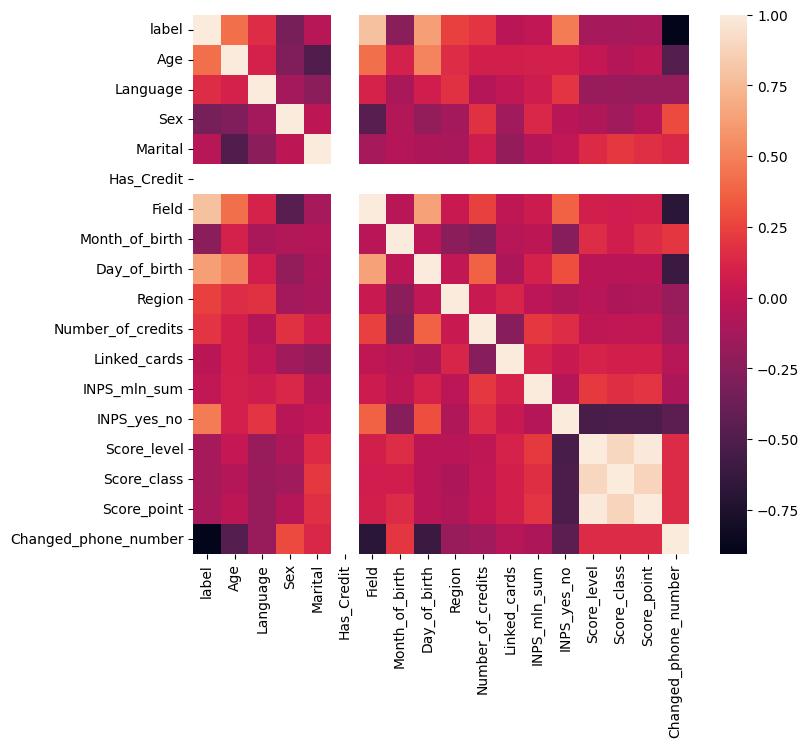

In [21]:


plt.subplots(figsize=(8,7))
sns.heatmap(df.corr())

In [22]:
df.corr().sum()

,0
label,1.999133
Age,1.707972
Language,0.620627
Sex,-0.488172
Marital,0.289753
Has_Credit,0.000000
Field,2.567057
Month_of_birth,0.288943
Day_of_birth,2.485245
Region,0.803512


In [23]:
counting_0_1 = df.pivot_table(columns=['label'], aggfunc='size')
print(counting_0_1)

label
0    26
1    22
dtype: int64


In [24]:
y = df['label']
X = df.drop(['label'], axis=1, inplace=False)

**Balancing the data**

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [26]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
print(Counter(y_ros))

Counter({0: 26, 1: 26})


**Splitting data to train and test**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size = 0.30, random_state = 101)

In [30]:
print(X_train.shape, X_test.shape)

(36, 17) (16, 17)


In [31]:
print(y_train.shape, y_test.shape)

(36,) (16,)


**Training Data in diffirent classification Models**

**SVM Classification**

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

model = SVC()
model.fit(X_train,y_train)
svm_pred = model.predict(X_test)
#model evaluation
print(round(accuracy_score(y_test, svm_pred),3))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


0.438
[[6 2]
 [7 1]]
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.33      0.12      0.18         8

    accuracy                           0.44        16
   macro avg       0.40      0.44      0.38        16
weighted avg       0.40      0.44      0.38        16



**Decision Tree Classification**

In [37]:
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier(random_state =0)
regressor.fit(X_train,y_train)
Dectree_pred = regressor.predict(X_test)

# Model evaluation
print(round(accuracy_score(y_test, Dectree_pred),3))
print(confusion_matrix(y_test, Dectree_pred))
print(classification_report(y_test, Dectree_pred))



1.0
[[8 0]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



**KNearestNeighbor**

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_trainKnn = sc.transform(X_train)
X_testKnn = sc.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_trainKnn, y_train)
knn_pred = knn.predict(X_testKnn)

# Evaluating  the Model
print(round(accuracy_score(y_test, knn_pred),3))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


0.812
[[6 2]
 [1 7]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.78      0.88      0.82         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16



**GradientBooster**

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print(round(accuracy_score(y_test, gb_pred),3))
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))


1.0
[[8 0]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# Predicting new Testing Data

In [44]:
df2 = pd.read_csv("/content/data_test.csv")

In [45]:
df2.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,40,1,2,4,1,0,3,1,12,2,1,2.4,1,0,0,-,1
1,0,36,2,2,4,1,0,5,1,13,1,2,0.0,1,0,0,-,1
2,0,31,1,2,4,1,0,7,1,13,1,1,0.3,0,0,0,-,2
3,0,29,1,2,4,1,0,1,1,13,1,1,0.9,1,0,0,-,1
4,0,38,1,2,4,1,0,10,1,13,1,2,4.3,0,4,2,318,1


In [46]:
df2 = df2.replace({'-':0})

In [47]:
df2['Score_point'].head()

,Score_point
0,0
1,0
2,0
3,0
4,318


In [48]:
New_Y = df2['label']
New_X = df2.drop(['label'], axis=1, inplace=False)

In [49]:
New_X.head()

,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,40,1,2,4,1,0,3,1,12,2,1,2.4,1,0,0,0,1
1,36,2,2,4,1,0,5,1,13,1,2,0.0,1,0,0,0,1
2,31,1,2,4,1,0,7,1,13,1,1,0.3,0,0,0,0,2
3,29,1,2,4,1,0,1,1,13,1,1,0.9,1,0,0,0,1
4,38,1,2,4,1,0,10,1,13,1,2,4.3,0,4,2,318,1


**Predicting new dataset with our Models**

### SVM

In [51]:
svm_new = model.predict(New_X)

# Evaluating Prediction
print(round(accuracy_score(New_Y, svm_new),3))
print(confusion_matrix(New_Y, svm_new))
print(classification_report(New_Y, svm_new))


0.521
[[21  5]
 [18  4]]
              precision    recall  f1-score   support

           0       0.54      0.81      0.65        26
           1       0.44      0.18      0.26        22

    accuracy                           0.52        48
   macro avg       0.49      0.49      0.45        48
weighted avg       0.50      0.52      0.47        48



## Decision Tree

In [52]:
Dectree_new = regressor.predict(New_X)

# Evaluating Prediction
print(round(accuracy_score(New_Y, Dectree_new),3))
print(confusion_matrix(New_Y, Dectree_new))
print(classification_report(New_Y, Dectree_new))

1.0
[[26  0]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



## K-Nearest Neighbors

In [53]:
sc = StandardScaler()
sc.fit(New_X)
X_trainKnn = sc.transform(New_X)


knn_pred = knn.predict(X_trainKnn)

# Evaluating Prediction
print(round(accuracy_score(New_Y, knn_pred),3))
print(confusion_matrix(New_Y, knn_pred))
print(classification_report(New_Y, knn_pred))

0.938
[[24  2]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.91      0.95      0.93        22

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



# Gradient Booster

In [54]:
gb_pred = gb.predict(New_X)

#Evaluating Prediction
print(round(accuracy_score(New_Y, gb_pred),3))
print(confusion_matrix(New_Y, gb_pred))
print(classification_report(New_Y, gb_pred))

1.0
[[26  0]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

